In [1]:
# 결국에 확률 싸움이다
# PAC Learning => 특정 엡실론보다 작게 만드는게 우리의 목표
# N 값을 무지하게 키우면 지수에 - 값이 존재하므로 에러를 줄일 수 있다
# 베이즈 정리를 사용하면 P(A|B) = P(B|A)P(A) / P(B)
# 이점: A가 원인일때 결과인 B를 찾아낼 수 있고 확률 찾기가 더 용이하다
# marginalization, summing out 두개에서 사용되는 기법

# Markov Assumption = 확률이 전이되는 것을 이용하여 ...
# P(E|D)P(D|C)...P(B|A)P(A) => N-gram (2-gram)

# Preprocessing
# 가장 중요한게 tokenizing
# 1. sentence를 tokenizing을 한다
# 2. 이 sentence를 word, regexp, tweet tokenizer 를 사용하여 tokenzing함

In [2]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt

# 자바에서 돌아가는데
# java(JVM)에서 resource 사용하니깐
# JVM을 jpype로 연결하고
# Python에서 사용하는 것이다

In [3]:
han = Hannanum()
kkm = Kkma()
kom = Komoran()
okt = Okt()

In [4]:
kkm.tagset
# 우리말의 형태소 종류를 보여줌
# 각 instance는 형태소를 다른 개수로 가지는데
# kkm이 제일 많다

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [6]:
from nltk.corpus import gutenberg

In [7]:
emma = gutenberg.open(gutenberg.fileids()[0]).read()

In [13]:
data = '''
아버지가방에들어가신다
'''

In [18]:
han.morphs(data)
han.pos(data)

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]

In [19]:
kkm.morphs(data)
kkm.pos(data)

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [20]:
kom.morphs(data)
kom.pos(data)

[('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]

In [21]:
okt.morphs(data)
okt.pos(data)

[('\n', 'Foreign'),
 ('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('\n', 'Foreign')]

In [23]:
han.pos('알잘딱깔센')

[('알잘딱깔센', 'N')]

In [24]:
kkm.pos('알잘딱깔센')
# 이렇게 분해하면 안되는데 분해해버림

[('알', 'NNG'),
 ('잘', 'MAG'),
 ('딱', 'MAG'),
 ('깔', 'VV'),
 ('ㄹ', 'ETD'),
 ('세', 'VV'),
 ('ㄴ', 'ETD')]

In [25]:
okt.pos('알잘딱깔센')

[('알잘', 'Verb'), ('딱', 'VerbPrefix'), ('깔', 'Verb'), ('센', 'Verb')]

In [26]:
# 따라서, 구어체 표현에 이런 tokenizer를 사용하기에 좋지 않다
# corpus = 시대상을 반영함, 국가 단위로 달라짐, 

In [27]:
# zipf's law
# 단어의 순위와 얘를 역순으로 넘긴거랑 동일하다
# 사람들이 자주쓰는 표현들이 정해져있다 라는 뜻

# 빈도를 나열했을 때와 순위를 나열한 것은 역순일 때가 같다


In [28]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

In [29]:
t1 = Text(word_tokenize(gutenberg))

TypeError: expected string or bytes-like object

In [31]:
import matplotlib.pyplot as plt

In [32]:
from konlpy.corpus import kolaw, kobill

In [33]:
law = kolaw.open(kolaw.fileids()[0]).read()

In [35]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize

kt1 = Text(law.split())
kt2 = Text(word_tokenize(law))
kt3=Text(regexp_tokenize(law, r'\b\w+\b'))
kt4=Text(han.morphs(law))
kt5=Text(kkm.morphs(law))
kt6=Text(kom.morphs(law))
kt7=Text(okt.morphs(law))
kt8=Text(han.pos(law))
kt9=Text(kkm.pos(law))
kt10=Text(kom.pos(law))
kt11=Text(okt.pos(law))
# pos_tag()

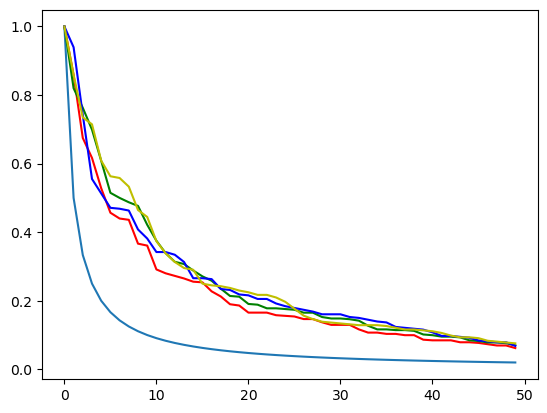

In [43]:
n = 50
plt.plot([1/i for i in range(1, n+1)])
# plt.plot([r[1]/kt1.count(kt1.vocab().max()) for r in kt1.vocab().most_common(n)], c = 'r')
# plt.plot([r[1]/kt2.count(kt2.vocab().max()) for r in kt2.vocab().most_common(n)], c = 'g')
# plt.plot([r[1]/kt3.count(kt3.vocab().max()) for r in kt3.vocab().most_common(n)], c = 'b')
# plt.plot([r[1]/kt4.count(kt4.vocab().max()) for r in kt4.vocab().most_common(n)], c = 'y')
plt.plot([r[1]/kt5.count(kt5.vocab().max()) for r in kt5.vocab().most_common(n)], c = 'r')
plt.plot([r[1]/kt6.count(kt6.vocab().max()) for r in kt6.vocab().most_common(n)], c = 'g')
plt.plot([r[1]/kt7.count(kt7.vocab().max()) for r in kt7.vocab().most_common(n)], c = 'b')
plt.plot([r[1]/kt8.count(kt8.vocab().max()) for r in kt8.vocab().most_common(n)], c = 'y')

In [39]:
kt3.vocab().most_common(50)

[('수', 87),
 ('①', 75),
 ('또는', 70),
 ('의하여', 66),
 ('법률이', 57),
 ('있다', 57),
 ('한다', 56),
 ('정하는', 50),
 ('그', 44),
 ('때에는', 42),
 ('관한', 39),
 ('바에', 37),
 ('국민은', 35),
 ('모든', 30),
 ('법률로', 30),
 ('정한다', 28),
 ('위하여', 26),
 ('가진다', 25),
 ('아니한다', 25),
 ('및', 25),
 ('이', 24),
 ('국회의', 23),
 ('필요한', 21),
 ('없다', 21),
 ('기타', 21),
 ('대통령은', 19),
 ('하며', 18),
 ('헌법에', 17),
 ('국가의', 16),
 ('대통령이', 16),
 ('이를', 15),
 ('할', 15),
 ('사항은', 15),
 ('의무를', 14),
 ('진다', 13),
 ('국가는', 13),
 ('이상의', 13),
 ('국회는', 13),
 ('임기는', 13),
 ('권리를', 12),
 ('관하여', 12),
 ('법률에', 11),
 ('다만', 11),
 ('대통령의', 11),
 ('대한', 10),
 ('받지', 10),
 ('의한', 10),
 ('있어서', 9),
 ('노력하여야', 9),
 ('자유를', 9)]

In [40]:
kt4.vocab().most_common(50)

[('하', 415),
 ('의', 396),
 ('.', 340),
 ('에', 283),
 ('이', 268),
 ('ㄴ다', 241),
 ('을', 232),
 ('ㄴ', 223),
 ('는', 214),
 ('은', 198),
 ('어', 176),
 ('를', 148),
 ('ㄹ', 134),
 ('법률', 115),
 ('지', 110),
 ('되', 109),
 ('있', 100),
 (',', 99),
 ('다', 97),
 ('수', 91),
 ('정하', 89),
 ('과', 86),
 ('의하', 83),
 ('가', 83),
 ('①', 78),
 ('또는', 70),
 ('로', 58),
 ('때', 55),
 ('관하', 54),
 ('국회', 53),
 ('으로', 52),
 ('어야', 52),
 ('국민', 51),
 ('대통령', 50),
 ('그', 47),
 ('에는', 46),
 ('아니하', 46),
 ('며', 45),
 ('아', 42),
 ('받', 42),
 ('와', 39),
 ('바', 37),
 ('국가', 36),
 ('위하', 33),
 ('헌법', 31),
 ('모든', 30),
 ('필요', 30),
 ('없', 30),
 ('기타', 26),
 ('및', 25)]

In [44]:
# zipf의 그래프에 가까울수록 맞는 결과가 나온 것임을 알 수 있다
# 이를 통해서 tokenizer가 제대로 작동중인지 인지할 수 있다
kt1.vocab().N(), kt1.vocab().B()

(4178, 2029)

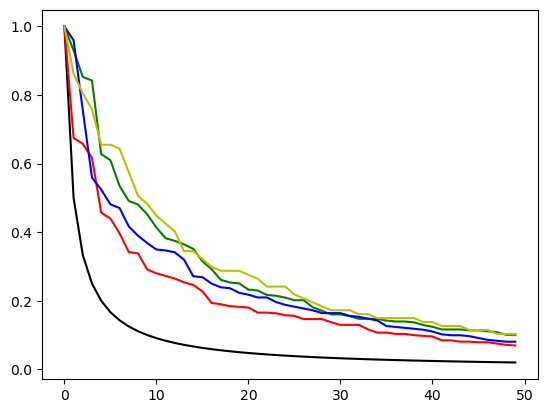

In [47]:
plt.plot([1/i for i in range(1, n+1)], c = 'k')
plt.plot([r[1]/kt9.count(kt9.vocab().max()) for r in kt9.vocab().most_common(n)], c = 'r')
plt.plot([r[1]/kt10.count(kt10.vocab().max()) for r in kt10.vocab().most_common(n)], c = 'g')
plt.plot([r[1]/kt11.count(kt11.vocab().max()) for r in kt11.vocab().most_common(n)], c = 'b')
plt.plot([r[1]/kt1.count(kt1.vocab().max()) for r in kt1.vocab().most_common(n)], c = 'y')

In [48]:
# 형태소 분석기에 따라서도 빈도가 달라진다
# 빈도수와 중요도를 사용하여 고빈도 저빈도를 나눌 수 있다
# head에 가까울수록 고빈도로 많이사용되는 단어를 의미한다
# tail에 가까울수록 저빈도로 사용되는 단어를 의미한다

In [49]:
# heap's law
# number of distinct words in a document as a function of the document length
# 하나의 법칙으로 우리가 모은 데이터가 이 법칙을 따르는지 확인해보면 좋다
k = 10, 100
b = .4, .6

In [51]:
heaps = list()

heaps.append(Text(word_tokenize(gutenberg.open(gutenberg.fileids()[0]).read())).vocab())

for file in gutenberg.fileids()[1:]:
    corpus = gutenberg.open(file).read()
    heaps.append(heaps[-1]+Text(word_tokenize(corpus)).vocab())

In [55]:
len(heaps), heaps[0].N(), heaps[-1].N(), heaps[0].B(), heaps[-1].B()

(18, 191785, 2538838, 8406, 61835)

In [56]:
heaps = list()

heaps.append(Text(kkm.morphs(kobill.open(kobill.fileids()[0]).read())).vocab())

for file in kobill.fileids()[1:]:
    corpus = kobill.open(file).read()
    heaps.append(heaps[-1]+Text(kkm.morphs(corpus)).vocab())

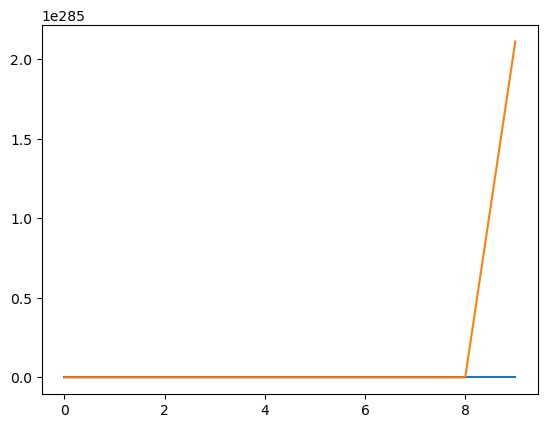

In [57]:
k = 15
b = .55
plt.plot([h.B() for h in heaps])
plt.plot([k**h.N()**b for h in heaps])

In [58]:
# n-gram 왜 중요함? token 구성된 시퀀스로 freq(A,B,C ... ) => P(A,B,C,...) 결합확률로 들어감

In [61]:
def ngram(s, n=2, t=True):
    # t= True 어절, False 음절
    result = []
    if not t:
        s = list(s)
    for i in range(len(s) - (n-1)):
        result.append(''.join(s[i:i+n]))

    return result

In [66]:
bigram = Text(ngram(kkm.morphs(law)))
unigram = Text(ngram(kkm.morphs(law), n=1))

In [71]:
import re

In [74]:
# NLU
seed = '대통령'
c = 0
s = 0.0
for i in range(15):
    result = {}
    for t in list(filter(lambda t: t.startswith(seed), bigram.tokens)):
        result[t] = bigram.count(t)/unigram.count(seed)
    n = sorted(result.items(), key=lambda r:r[1], reverse=True)[0]
    print(n)
    seed = re.sub(seed, '', n[0])

unigram.count(seed), c, s

('대통령은', 0.3333333333333333)
('은법률', 0.22564102564102564)
('법률이', 0.48760330578512395)
('이정하', 0.2916666666666667)
('정하는', 0.5681818181818182)
('는바', 0.13167259786476868)
('바에', 1.0)
('에의하', 0.2530487804878049)
('의하여', 0.7951807228915663)
('여야하', 0.2080536912751678)


IndexError: list index out of range

In [75]:
plaw = re.sub(r'^\s+|\s+$', '', re.sub(r'\s+', ' ', law))
bigram = Text(ngram(plaw, t=False))
unigram = Text(ngram(plaw, n=1, t=False))

In [76]:
seed = '대통령'
c = 0
s = 0.0
# for i in range(15):
#     result = {}
result = {}
for t in list(filter(lambda t: t.startswith(seed[-1]), bigram.tokens)):
    result[t] = bigram.count(t)/unigram.count(seed[-1])
sorted(result.items(), key=lambda r:r[1], reverse=True)[0]
    # print(n)
    # seed = re.sub(seed, '', n[0])

AttributeError: 'list' object has no attribute 'tokens'